In [1]:
import os
os.chdir("/home/ramon/msc/qif-samples/experiments")
import numpy as np
import itertools as it
from fractions import Fraction
from math import floor, ceil, factorial, log10
from scipy.special import binom
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from util import float_equal
from tqdm import tqdm
from termcolor import colored

In [2]:
def vg_in(n,m):
    return 3/4 + 1/(4 * (floor(m/2) + ceil((m+1)/2)))

def vg_out(n,m):
    return 3/4 - 1/(4 * (floor((m+1)/2) + ceil(m/2) +1))

def vg_unk(n,m):
    if m%2 == 1:
        return (3*n*m + 2*m + 5*n + 2)/(4*n*(m+2))
    return (3*n*m + 2*m + 2*n)/(4*n*(m+1))

# Read csv containing posterior vulnerabilities for utility
post_vul_ut = []
with open("uniformfrequencies/post_vul_utility.csv", "r") as csvfile:
    for line in csvfile:
        post_vul_ut.append(list(map(lambda x : float(x), line.strip().split(","))))

# Posterior vulnerability - Privacy adversaries for fixed $n$ and varying $m$

In [3]:
def plot1(n, m_range):
    post_in, post_out, post_unk = [], [], []
    for m in m_range:
        post_in.append(vg_in(n,m))
        post_out.append(vg_out(n,m))
        post_unk.append(vg_unk(n,m))

    font = {
        "size": 20,
    }
    plt.rc('font', **font)
    plt.figure(figsize=(20,10))

    plt.title("Posterior vulnerability for privacy when $n=10^%d$"%(int(log10(n))))
    plt.xlabel("Sample size $m$")
    plt.ylabel("Posterior vulnerability")
    
    plt.xlim((0,n+2))
    plt.axvline(x=n//2, color='grey')
    plt.xticks(list(range(0,n+1,10)))
    plt.plot(m_range, post_in,  marker='o', ms=6, markevery=0.025,label=r"Adversary (i)'s posterior $V_g[\pi^{in} \vartriangleright S]$", color='red')
    plt.plot(m_range, post_unk, marker='^', ms=6, markevery=0.025,label=r"Adversary (iii)'s posterior $V_g[\pi^{unk} \vartriangleright S]$", color='green')
    plt.plot(m_range, post_out, marker='x', ms=6, markevery=0.025,label=r"Adversary (ii)'s posterior $V_g[\pi^{out} \vartriangleright S]$", color='blue')
    plt.legend()
    plt.grid(alpha=.7)

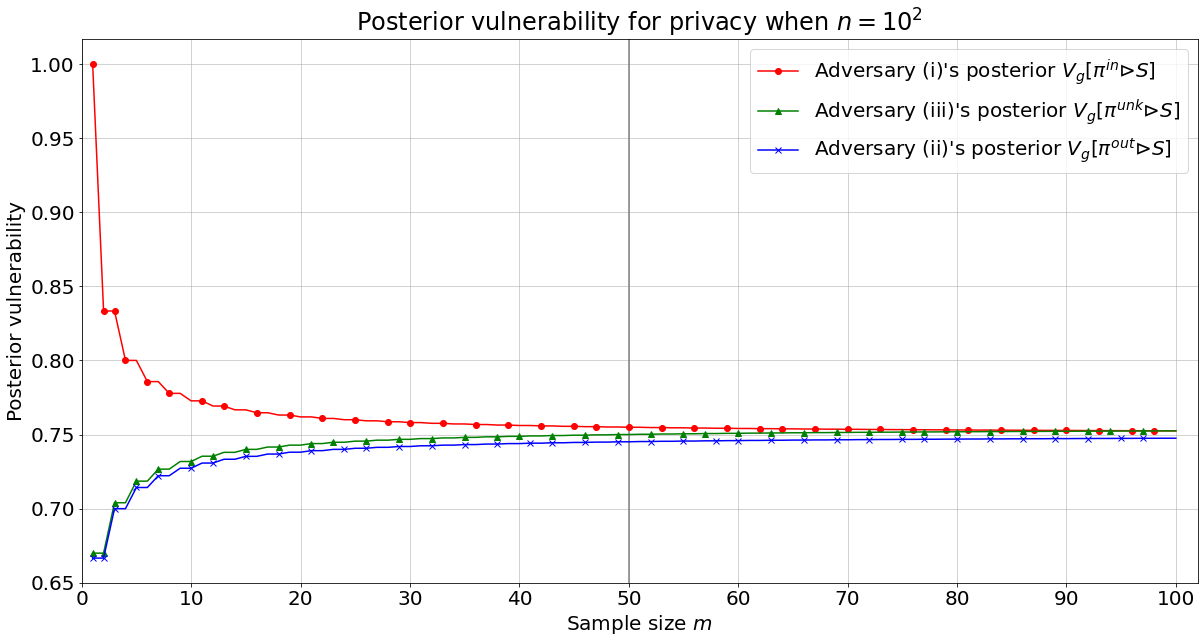

In [4]:
n = 10**2
m_range = list(range(1,n+1)) 
plot1(n, m_range)

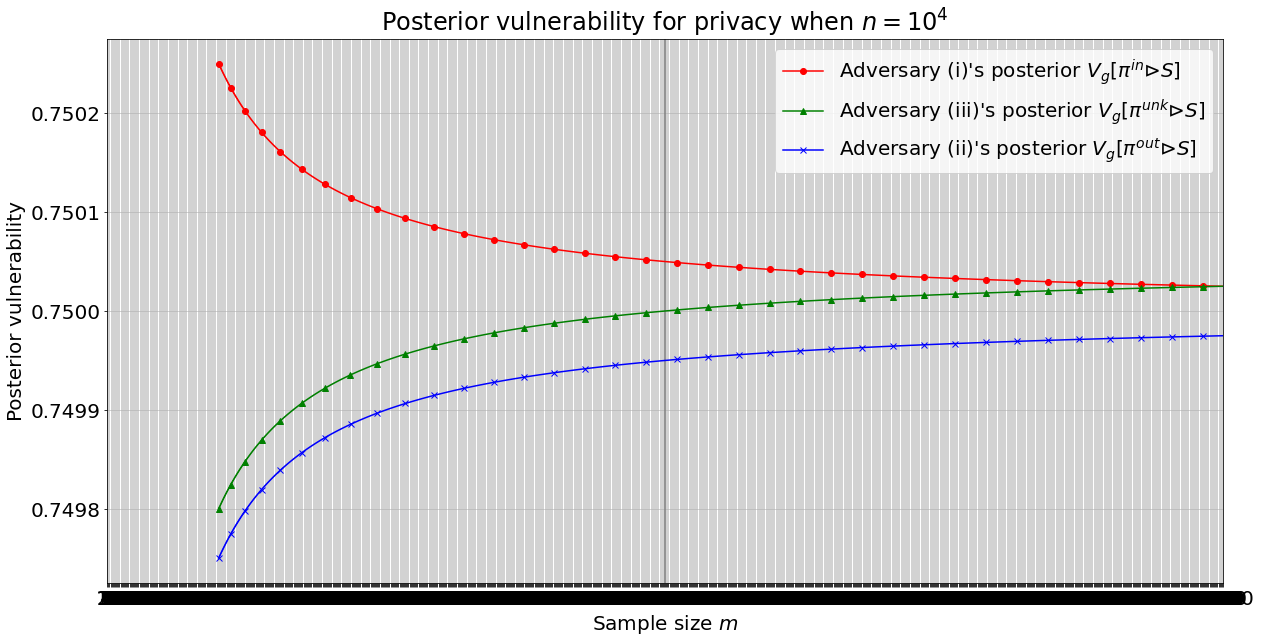

In [5]:
n, m_range = 10**4, list(range(10**3,10**4+1)) 
plot1(n, m_range)

# Posterior vulnerability - Privacy adversaries varying $n$ and fixed $m$

In [6]:
def plot2(n_range, m):
    post_in, post_out, post_unk = [], [], []
    for n in n_range:
        post_in.append(vg_in(n,m))
        post_out.append(vg_out(n,m))
        post_unk.append(vg_unk(n,m))

    font = {
        "size": 20,
    }
    plt.rc('font', **font)
    plt.figure(figsize=(20,10))

    plt.title("Posterior vulnerability for privacy when $m=10^%d$"%(int(log10(m))))
    plt.xlabel("Population size $n$")
    plt.ylabel("Posterior vulnerability")
    
    plt.xscale('log')
    plt.plot(n_range, post_in,  marker='o', ms=6, markevery=0.05, label=r"Adversary (i)'s posterior $V_g[\pi^{in} \vartriangleright S]$", color='red')
    plt.plot(n_range, post_unk, marker='^', ms=6, markevery=0.05, label=r"Adversary (iii)'s posterior $V_g[\pi^{unk} \vartriangleright S]$", color='green')
    plt.plot(n_range, post_out, marker='x', ms=6, markevery=0.05, label=r"Adversary (ii)'s posterior $V_g[\pi^{out} \vartriangleright S]$", color='blue')
    plt.legend()
    plt.grid(alpha=.7)

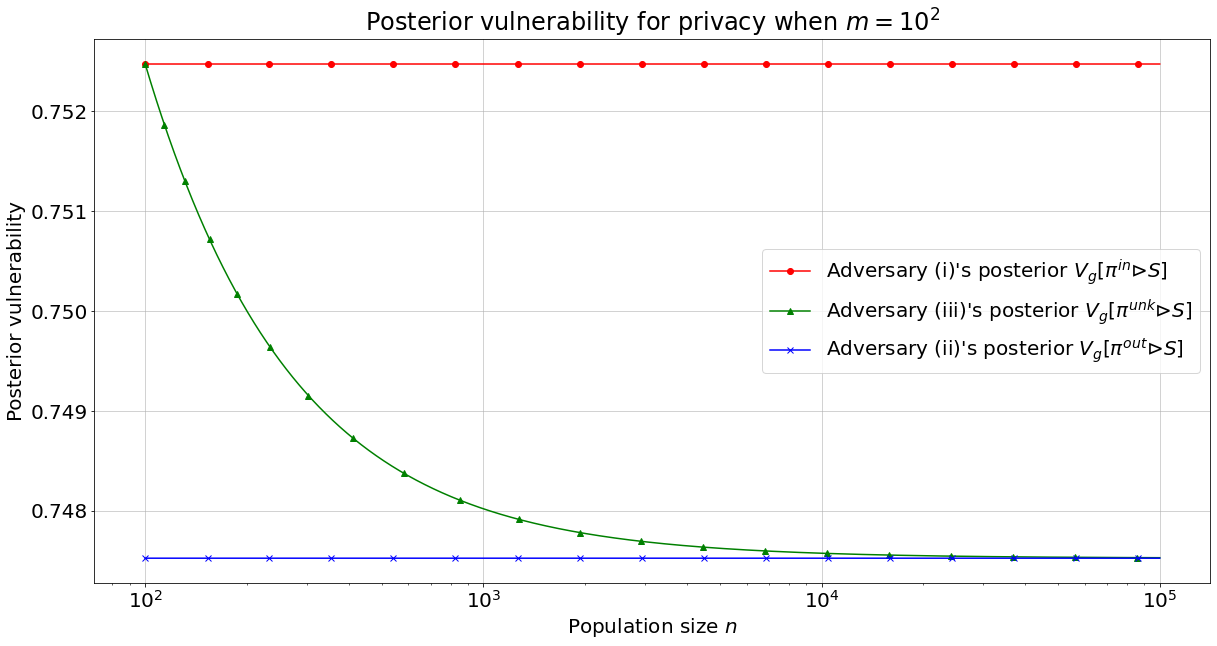

In [7]:
m = 10**2
n_range = list(range(10**2,10**5))
plot2(n_range, m)

# Posterior vulnerability - Unknown and utility adversaries for fixed $n$ and varying $m$

In [28]:
def plot3(n, m_range):
    post_in, post_out, post_unk = [], [], []
    for m in m_range:
        post_in.append(vg_in(n,m))
        post_out.append(vg_out(n,m))
        post_unk.append(vg_unk(n,m))

    font = {
        "size": 20,
    }
    plt.rc('font', **font)
    plt.figure(figsize=(20,10))

    plt.title("Posterior vulnerability privacy x utility when $n=%d$"%(n))
    plt.xlabel("Sample size $m$")
    plt.ylabel("Posterior vulnerability")
    
    plt.xlim((0,n+2))
    plt.ylim((0,0.8))
    # plt.yticks([i/10 for i in range(0,11)])
    # plt.axvline(x=30, color='grey')
    plt.xticks(list(range(0,n+1,50)))
    plt.plot(m_range, post_unk, marker='^', ms=6, markevery=0.025,label=r"Adversary (iii)'s posterior $V_g[\pi^{unk} \vartriangleright S]$", color='green')
    plt.plot(m_range, np.array(post_vul_ut[n-1]), marker='.', ms=7, markevery=0.025,label=r"Utility adversary's posterior $U_{\ell}[\pi^{ut} \vartriangleright S^{ut}]$", color='blue')
    plt.legend()
    plt.grid(alpha=.7)

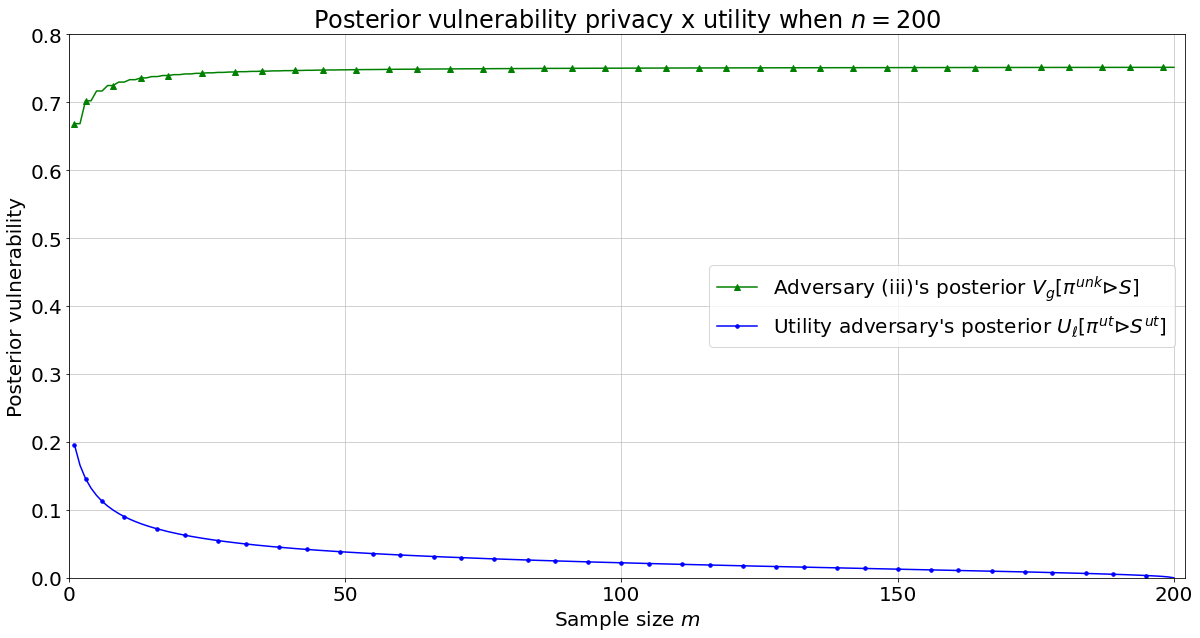

In [29]:
n = 200
m_range = list(range(1,n+1)) 
plot3(n, m_range)

# Posterior vulnerability - Unknown and utility adversaries varying $n$ and fixed $m$

In [10]:
def plot4(n_range, m):
    post_in, post_out, post_unk = [], [], []
    for n in n_range:
        post_in.append(vg_in(n,m))
        post_out.append(vg_out(n,m))
        post_unk.append(vg_unk(n,m))

    font = {
        "size": 20,
    }
    plt.rc('font', **font)
    plt.figure(figsize=(20,10))

    plt.title("Posterior vulnerability for privacy when $m=10^%d$"%(int(log10(m))))
    plt.xlabel("Population size $n$")
    plt.ylabel("Posterior vulnerability")
    
    plt.ylim((0,1))
    plt.plot(n_range, post_unk, marker='^', ms=6, markevery=0.05, label=r"Adversary (iii)'s posterior $V_g[\pi^{unk} \vartriangleright S]$", color='green')
    plt.plot(n_range, [post_vul_ut[n-1][m-1] for n in n_range], marker='.', ms=7, markevery=0.05, label=r"Utility adversary's posterior $U_{\ell}[\pi^{ut} \vartriangleright S^{ut}]$", color='red')
    plt.legend()
    plt.grid(alpha=.7)

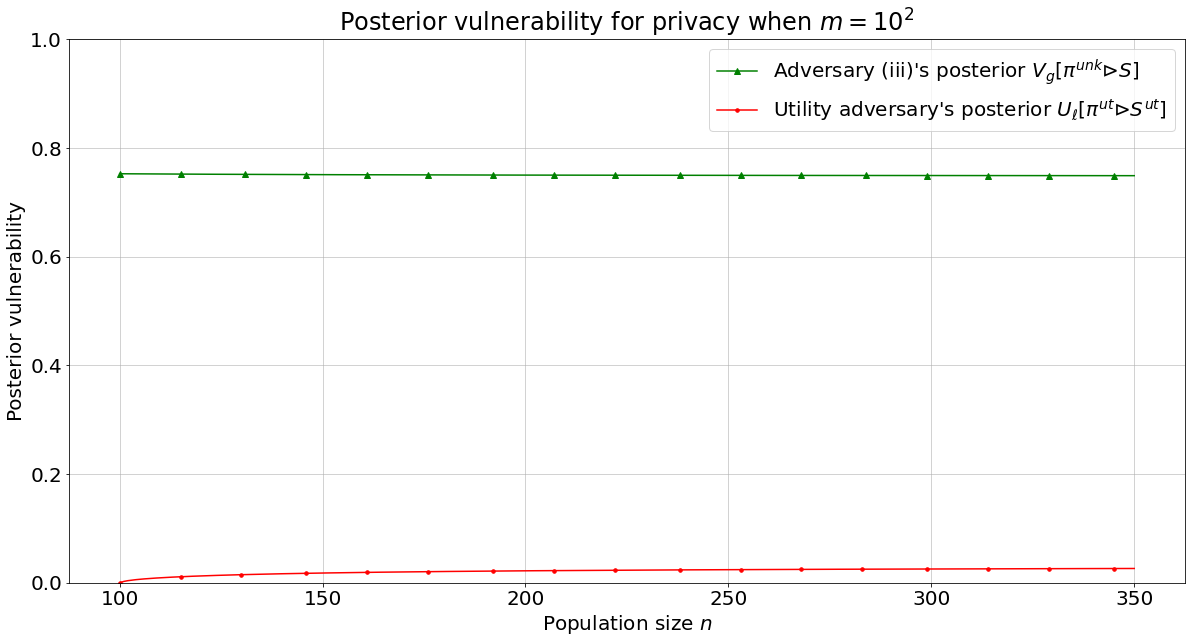

In [11]:
m = 100
n_range = list(range(100,351))
plot4(n_range, m)